In [138]:
#Kitchen Sink Model
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
sal = pd.read_csv('../Data/salaries_parent.csv')
sal.shape

(1444, 152)

In [140]:
sal.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [141]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

(1412, 153)

In [142]:
#Fill the missing values with mean value
sal2.fillna(sal2.mean(), inplace=True)
sal2.isnull().values.any()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True

In [143]:
# list of X vars to include
# Split into Numerica & Categorical
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numerics)

# Remove Y salary from numerical X Vars 
X_numeric.drop('salary', axis=1, inplace=True) 

X_categorical = sal2.select_dtypes(exclude=numerics)
X_numeric.shape

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1412, 135)

In [144]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [145]:
# Create numeric dummy features from categorical set
X_dummy_features = []
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features.append(temp_dummies)
X_dummy_features = pd.concat(X_dummy_features, axis=1)
X_dummy_features = X_dummy_features.as_matrix()


In [146]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [147]:
# y is salary
y = sal2.iloc[:, 98].values
X.shape

(1412, 753)

In [178]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=1)

In [179]:
def modelPerformance ():
    ### MODEL PERFORMANCE ###
    

    # The Mean Squared Error
    print("Mean Squared Error, training data: %d"
          % np.mean((regr.predict(X_train) - y_train) ** 2))
    print("Mean Squared Error, test data: %d"
          % np.mean((regr.predict(X_test) - y_test) ** 2))
    print(30 * '* ')

    # Variance score
    print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
    print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
    print(30 * '* ')

    ### GRAPHS: DISTRIBUTION OF ERROR ###
    print('Distribution of prediction error on training data:')
    predError = regr.predict(X_train) - y_train
    plt.hist(predError)
    plt.xlim(-80000, 80000)
    plt.show()

    print('Distribution of prediction error on test data:')
    predError = regr.predict(X_test) - y_test
    plt.hist(predError)
    plt.xlim(-80000, 80000)
    plt.show()

In [180]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 50221.7290513
Mean Squared Error, training data: 56781848
Mean Squared Error, test data: 85327104
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.82
Variance score, test data: 0.79
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


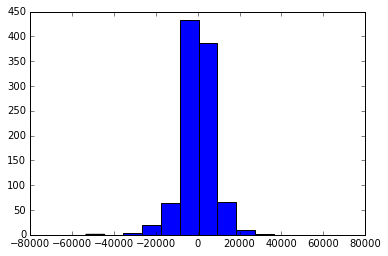

Distribution of prediction error on test data:


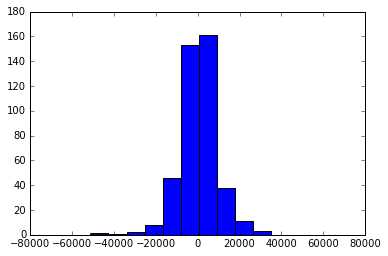

In [181]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)

modelPerformance()

Mean Squared Error, training data: 57248383
Mean Squared Error, test data: 85166554
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.81
Variance score, test data: 0.79
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


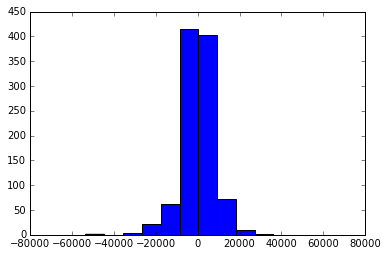

Distribution of prediction error on test data:


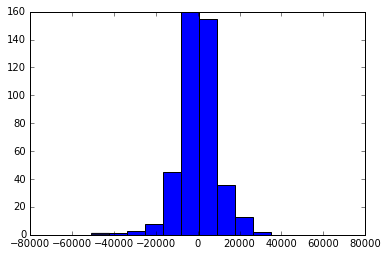

In [182]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Create linear regression object
regr = linear_model.Ridge()
# regr = linear_model.BayesianRidge(normalize=True)  # Lower RSS

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

modelPerformance()